#### Import training and test dataset from .csv

In [1]:
import pandas as pd
import time

In [2]:
# Load training data
dataset_training_csv_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\training_dataset\\angles_ap_labelled_training.csv'
dataset_training_csv = pd.read_csv(dataset_training_csv_path)
dataset_training_csv

,PT,MT,TL/L,image_training_file,cobb_angle_training_file
0,6.2069,0.00000,1.261400,sunhl-1th-02-Jan-2017-162 A AP.jpg,sunhl-1th-02-Jan-2017-162 A AP.jpg.mat
1,23.8107,0.00000,0.851886,sunhl-1th-02-Jan-2017-162 B AP.jpg,sunhl-1th-02-Jan-2017-162 B AP.jpg.mat
2,21.1172,0.00000,0.000000,sunhl-1th-03-Jan-2017-163 A AP.jpg,sunhl-1th-03-Jan-2017-163 A AP.jpg.mat
3,10.8144,8.60388,0.000000,sunhl-1th-03-Jan-2017-163 B AP.jpg,sunhl-1th-03-Jan-2017-163 B AP.jpg.mat
4,18.1538,0.00000,1.748480,sunhl-1th-03-Jan-2017-164 A AP.jpg,sunhl-1th-03-Jan-2017-164 A AP.jpg.mat
...,...,...,...,...,...
476,12.5325,0.00000,11.484000,sunhl-1th-30-Dec-2016-159 A AP2.jpg,sunhl-1th-30-Dec-2016-159 A AP2.jpg.mat
477,11.0118,10.37890,0.000000,sunhl-1th-30-Dec-2016-159 B AP.jpg,sunhl-1th-30-Dec-2016-159 B AP.jpg.mat
478,5.6424,3.95370,2.821400,sunhl-1th-30-Dec-2016-159 C AP.jpg,sunhl-1th-30-Dec-2016-159 C AP.jpg.mat
479,16.3437,0.00000,0.000000,sunhl-1th-30-Dec-2016-160 A AP.jpg,sunhl-1th-30-Dec-2016-160 A AP.jpg.mat


In [3]:
# Load test data
dataset_test_csv_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\test_dataset\\angles_ap_labelled_test.csv'
dataset_test_csv = pd.read_csv(dataset_test_csv_path)
dataset_test_csv

,PT,MT,TL/L,image_test_file,cobb_angle_test_file
0,12.5578,0.00000,0.938543,sunhl-1th-01-Mar-2017-310 C AP.jpg,sunhl-1th-01-Mar-2017-310 C AP.jpg.mat
1,7.4942,1.00940,0.000000,sunhl-1th-01-Mar-2017-310 a ap.jpg,sunhl-1th-01-Mar-2017-310 a ap.jpg.mat
2,14.0048,0.00000,0.501069,sunhl-1th-01-Mar-2017-311 A AP.jpg,sunhl-1th-01-Mar-2017-311 A AP.jpg.mat
3,13.3802,0.00000,1.422200,sunhl-1th-01-Mar-2017-311 C AP.jpg,sunhl-1th-01-Mar-2017-311 C AP.jpg.mat
4,16.1798,1.23238,0.000000,sunhl-1th-01-Mar-2017-311 D AP.jpg,sunhl-1th-01-Mar-2017-311 D AP.jpg.mat
...,...,...,...,...,...
123,7.8933,0.00000,1.726000,sunhl-1th-28-Feb-2017-307 B AP.jpg,sunhl-1th-28-Feb-2017-307 B AP.jpg.mat
124,22.5108,0.00000,14.726900,sunhl-1th-28-Feb-2017-308 A AP.jpg,sunhl-1th-28-Feb-2017-308 A AP.jpg.mat
125,9.3330,0.73155,6.376700,sunhl-1th-28-Feb-2017-309 A AP.jpg,sunhl-1th-28-Feb-2017-309 A AP.jpg.mat
126,17.5526,8.90332,1.856840,sunhl-1th-28-Feb-2017-309 B AP.jpg,sunhl-1th-28-Feb-2017-309 B AP.jpg.mat


#### Prepare dictionary for training image data and its Cobb angle

In [4]:
import torch

In [5]:
training_dataset_dict = {} # good approach to maintain image - target_angle relation

# get train image list and its path
training_image_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\data\\training\\'

# get list of keys ie filepath
training_image_filepath_key = dataset_training_csv['image_training_file'].values.tolist()

# get list of values for dict
training_cobb_angle_values = dataset_training_csv[['PT', 'MT', 'TL/L']].values

# add to dictionary
for i in range(len(training_image_filepath_key)):
    training_dataset_dict[training_image_path + training_image_filepath_key[i]] = torch.tensor(training_cobb_angle_values[i], dtype=torch.float32)

#### Prepare dictionary for test image data and its Cobb angle

In [6]:
test_dataset_dict = {}
test_image_path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\data\\test\\'
test_image_filepath_key = dataset_test_csv['image_test_file'].values.tolist()
test_cobb_angle_values = dataset_test_csv[['PT', 'MT', 'TL/L']].values

for i in range(len(test_image_filepath_key)):
    test_dataset_dict[test_image_path + test_image_filepath_key[i]] = torch.tensor(test_cobb_angle_values[i], dtype=torch.float32)

#### Perform training - validation splitting

In [7]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [8]:
# transform to list before inputting into splitting function
training_image_list = list(training_dataset_dict.keys())
training_true_cobb_angle_list = list(training_dataset_dict.values())

In [9]:
# Split the lists into training and validation sets
training_images, val_images, training_true_cobb_angle, val_true_cobb_angle = train_test_split(training_image_list, training_true_cobb_angle_list, test_size=0.2, random_state=42)

In [10]:
# Create dictionaries again for training and validation sets
training_input_dataset = {img: true_cobb_angle for img, true_cobb_angle in zip(training_images, training_true_cobb_angle)}
val_input_dataset = {img: true_cobb_angle for img, true_cobb_angle in zip(val_images, val_true_cobb_angle)}

#### CustomDataset

In [11]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from PIL import Image, ImageOps


In [12]:
# create dictionary dataset where key is image path and value is PT, MT, TL/L values
class CustomDataset(Dataset):
    def __init__(self, data_dict, transform_image_tensor, custom_img_resize_w_h=(255,255)):
        self.image_dict = data_dict
        self.image_paths = list(data_dict.keys())
        self.transform_image_tensor = transform_image_tensor
        self.custom_img_resize_w_h = custom_img_resize_w_h
        
        
    def __getitem__(self, index):
        image_path = self.image_paths[index] # image_path is the key
        angles_value = self.image_dict[image_path]
        
        image = Image.open(image_path).convert('L')
        
        # custom resize image while maintaining aspect ratio
        image = self.resize_with_padding(image, self.custom_img_resize_w_h)
        
        # transform image if required
        if self.transform_image_tensor is not None:
            image = self.transform_image_tensor(image)
        

        
        return image, image_path, angles_value
    
    def __len__(self):
        return len(self.image_dict)
    
    def resize_with_padding(self, image, output_size):
        original_width, original_height = image.size
        target_width, target_height = output_size

        # Calculate aspect ratios
        aspect_ratio = original_width / original_height
        target_ratio = target_width / target_height

        # Calculate the new dimensions while maintaining aspect ratio
        if aspect_ratio > target_ratio:
            new_width = target_width
            new_height = int(new_width / aspect_ratio)
        else:
            new_height = target_height
            new_width = int(new_height * aspect_ratio)

        # Resize the image while preserving the aspect ratio
        resized_image = image.resize((new_width, new_height), resample=Image.Resampling.LANCZOS)

        # Create a new image with the target size and paste the resized image onto it
        padded_image = Image.new('L', (target_width, target_height))
        x_offset = (target_width - new_width) // 2
        y_offset = (target_height - new_height) // 2
        padded_image.paste(resized_image, (x_offset, y_offset))

        return padded_image

In [13]:
transform_images_tensor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x - torch.min(x)) / (torch.max(x) - torch.min(x))),
    transforms.Lambda(lambda x: x.type(torch.float32))
])

In [14]:
transformed_training_dataset = CustomDataset(training_input_dataset, transform_images_tensor, (1920,1920))
transformed_validation_dataset = CustomDataset(val_input_dataset, transform_images_tensor, (1920,1920))

C:\Users\iqmal_pc\Desktop\fyp_experiment\data\training\sunhl-1th-20-Jul-2016-12 A AP.jpg
tensor([11.4642,  0.6524,  3.8796])


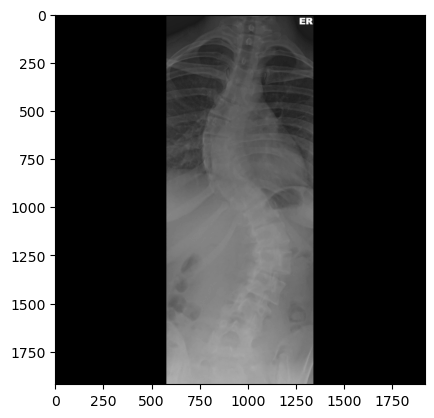

In [15]:
img, img_path, angle = transformed_training_dataset.__getitem__(0)
plt.imshow(img.squeeze(), cmap='gray')
print(img_path)
print(angle)

#### Create training and validation dataloaders

In [16]:
# Create a data loader for batching and shuffling the data
# batch_size = 32

training_loader = DataLoader(transformed_training_dataset, batch_size=2, shuffle=True)
validation_loader =  DataLoader(transformed_validation_dataset, batch_size=1, shuffle=False)

#### Deep Neural Network Architecture

In [17]:
import torch.nn as nn
import torch.optim as optim

In [18]:
# Model architecture
# neural network arch

class My_Regression_Model_2(nn.Module):
    def __init__(self, num_channel=1): #default for grayscale image
        super().__init__()
        
        # same maxpool dimension for all CNN layers
        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
        
        # same ReLU activation function for all CNN layer
        self.relu = nn.ReLU()
        
        # initialize 1st conv=>relu=>pool
        self.conv1 = nn.Conv2d(in_channels=num_channel, out_channels=16, kernel_size=(3,3))
        
        # initialize 2nd conv=>relu=>pool
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3))
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3,3))
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3,3))
        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3,3))
        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=(3,3))
        self.conv7 = nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=(3,3))
        
        # initialize 1st fc=>relu
        self.fc1 = nn.Linear(in_features=1024*13*13, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        
        # final fc
        self.fc3 = nn.Linear(in_features=50, out_features=3)
        
    def forward(self, x): # c, h, w
        
        # 1st layer        
        x = self.conv1(x) # in -> (1, 1920, 1920) | out -> (16, 1918, 1918)
        x = self.relu(x) 
        x = self.maxpool(x) # in -> (16, 1918, 1918) | out -> (16, 959, 959)
        
        # 2nd layer
        x = self.conv2(x) 
        x = self.relu(x) 
        x = self.maxpool(x) 
        
        # 3rd layer
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 4th layer
        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 5th layer
        x = self.conv5(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 6th layer
        x = self.conv6(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 7th layer
        x = self.conv7(x)
        x = self.relu(x)
        x = self.maxpool(x) # in -> (1024, 26, 26) | out -> (1024, 13, 13)
        
        # flatten
        x = torch.flatten(x,1)
        
        # feed forward
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        
        # final feed forward
        output = self.fc3(x)
        return output

#### Training process

In [19]:
# set up model instance
model = My_Regression_Model_2()

In [20]:
# Move the model to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

My_Regression_Model_2(
  (maxpool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=173056, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [21]:
# set up optimizer and loss function
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

In [22]:
# to save validation loss and training loss
loss_list_data = []

# to keep track lowest loss
lowest_val_loss = float('inf')

start_time = time.time()

# training loop with validation
for epoch in range(num_epochs):
    
    # training phase
    model.train()                                       # allow weights and biases adjusting
    training_loss = 0.0
    for image_input, _, target_angle in training_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        optimizer.zero_grad()                           # clearing previous loss derivative
        predicted = model(image_input)                  # forward 
        loss = criterion(predicted, target_angle)       # computing loss
        loss.backward()                                 # computing loss derivative with respect of weights and biases
        optimizer.step()                                # adjusting weights and biases
        training_loss += loss.item()                    # summing all batches losses for averaging
    training_loss /= len(training_loader)
        
    # validation phase in at end of every epoch
    model.eval()                                        # block weights and biases adjsuting
    val_loss = 0.0
    with torch.no_grad():                                # remove all computed derivatives
        for image_input, _, target_angle in validation_loader:
            # move input and output to cuda if available
            image_input = image_input.to(device)
            target_angle = target_angle.to(device)
            predicted = model(image_input)
            # for averaging validation loss
            val_loss += criterion(predicted, target_angle).item()
    
    val_loss /= len(validation_loader) # calculating average validation loss
    
    # Print the training and validation loss for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {training_loss}, Validation Loss: {val_loss}")    
    
    # for graphing evaluation later
    loss_list_data.append((epoch+1, training_loss, val_loss))
    
    # save best model with lowest validation loss
    if lowest_val_loss > val_loss:
        lowest_val_loss = val_loss
        best_model = model.state_dict()
        print('Lowest val_loss found')


end_time = time.time()

# save the best model found
path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\saved_models\\training_3\\'
torch.save(best_model, path + 'best_training_3.pt')

Epoch [1/100], Training Loss: 18.40852744318545, Validation Loss: 19.085777970626182
Lowest val_loss found
Epoch [2/100], Training Loss: 11.858974797961613, Validation Loss: 12.559802353996592
Lowest val_loss found
Epoch [3/100], Training Loss: 11.86207047229012, Validation Loss: 12.324077306488126
Lowest val_loss found
Epoch [4/100], Training Loss: 11.928323524072766, Validation Loss: 11.881571426219548
Lowest val_loss found
Epoch [5/100], Training Loss: 11.569456510866681, Validation Loss: 12.18212774611011
Epoch [6/100], Training Loss: 11.111716648874184, Validation Loss: 12.177337696257325
Epoch [7/100], Training Loss: 11.03750214384248, Validation Loss: 14.566553353034344
Epoch [8/100], Training Loss: 10.931659955531359, Validation Loss: 12.447469473499613
Epoch [9/100], Training Loss: 11.595477871441593, Validation Loss: 12.134897792769461
Epoch [10/100], Training Loss: 11.214885637164116, Validation Loss: 12.656113060479312
Epoch [11/100], Training Loss: 11.15852276639392, Valid

#### Compute training time

In [23]:
training_time = end_time - start_time
print("Training time elapsed: " + str(training_time) + " seconds")

Training time elapsed: 5614.613120555878 seconds


#### Save latest model

In [24]:
# save model 
path = 'C:\\Users\\iqmal_pc\\Desktop\\fyp_experiment\\saved_models\\training_3\\'
torch.save(model.state_dict(), path + 'finished_training_3.pt')

#### Testing model

In [25]:
# loading test dataset
transformed_test_dataset = CustomDataset(test_dataset_dict, transform_images_tensor, (1920,1920))

In [26]:
# create test_loader
test_loader = DataLoader(transformed_test_dataset, batch_size=2, shuffle=False)

In [27]:
# test finished trained model
test_loss = 0.0
model.eval()
with torch.no_grad():
    for image_input, _, target_angle in test_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        predicted = model(image_input)
        test_loss += criterion(predicted, target_angle).item()

test_loss /= len(test_loader) # calculating average test_loss
print(f"Final model testing loss: {test_loss}")

Final model testing loss: 9.461907740682364


In [28]:
# test best model
# load best model
the_best_model = My_Regression_Model(input_channels)
the_best_model.load_state_dict(torch.load(path + 'best_training_3.pt')) # load the saved best model weights & biases dictionary
the_best_model = the_best_model.to(device)
# testing phase using best model
test_loss = 0.0
the_best_model.eval()
with torch.no_grad():
    for image_input, _, target_angle in test_loader:
        # move input and output to cuda if available
        image_input = image_input.to(device)
        target_angle = target_angle.to(device)
        predicted = the_best_model(image_input)
        test_loss += criterion(predicted, target_angle).item()

test_loss /= len(test_loader) # calculating average test_loss
print(f"Best model testing loss: {test_loss}")

NameError: name 'My_Regression_Model' is not defined